In [31]:
import pandas as pd
diabetes = pd.read_csv('Iris.csv')
diabetes.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
X = pd.DataFrame()
def generate():
    X = diabetes.loc[:,diabetes.columns != 'Species']
    return X
X = generate()

In [33]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [34]:
y = pd.DataFrame()
def generate():
    y = diabetes.loc[:,diabetes.columns == 'Species']
    return y
y = generate()

In [35]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [36]:
from sklearn.preprocessing import StandardScaler
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X = generate()

In [37]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=0) 
X_train, X_test, y_train, y_test = generate()

In [38]:
def generate():
    print(X_train.shape)
    print(y_train.shape)
    return
generate()

(112, 5)
(112, 1)


In [39]:
def generate():
    print(X_test.shape)
    print(y_test.shape)
    return
generate()

(38, 5)
(38, 1)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model1 = KNeighborsClassifier(n_neighbors = 1)
    knn_model1.fit(X_train, y_train)
    return knn_model1
knn_model1 = generate()

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

def generate():
    param_dist = {"n_neighbors": range(1,6),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    

    n_iter_search = 25
    knn_model = KNeighborsClassifier()
    
    return RandomizedSearchCV(knn_model,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
knn_model2 = generate()
knn_model2.fit(X_train,y_train)                                         # fitting the model

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_neighbors': range(1, 6), 'algorithm': ['auto', 'ball_tree'], 'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32), 'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_list = []
def generate():
    for i in range(1,6):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, pred_i))
    
    print("Maximum accuracy and the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

generate()

Maximum accuracy and the corresponding value of k is (1.0, 5) respectively.


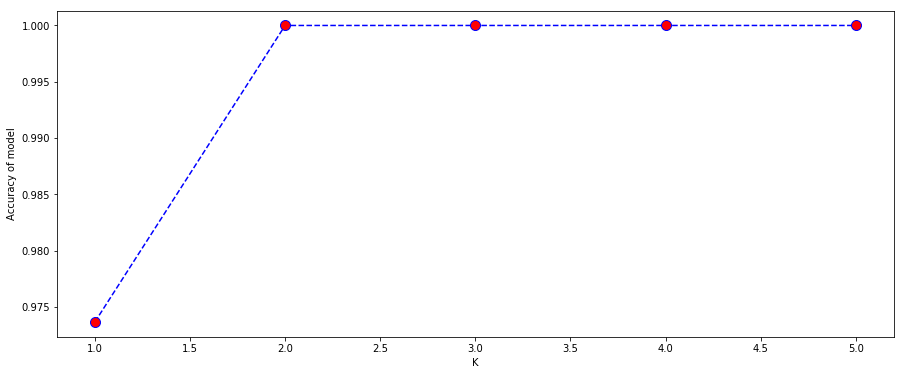

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,6),accuracy_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model3 = KNeighborsClassifier(n_neighbors = 5)
    knn_model3.fit(X_train, y_train)
    return knn_model3
knn_model3 = generate()

In [47]:
from sklearn.linear_model import LogisticRegression
def generate():
    logreg = LogisticRegression(random_state = 0)
    logreg.fit(X_train,y_train)
    return logreg
logreg = generate()

In [48]:
def generate():
    predictions_knn_model1 = knn_model1.predict(X_test)
    predictions_knn_model2 = knn_model2.predict(X_test) 
    predictions_knn_model3 = knn_model3.predict(X_test)
    predictions_logreg = logreg.predict(X_test)
    return predictions_knn_model1,predictions_knn_model2,predictions_knn_model3,predictions_logreg
predictions_knn_model1,predictions_knn_model2,predictions_knn_model3,predictions_logreg = generate()

In [49]:
from sklearn.metrics import accuracy_score
def generate():
    print('\n\n Accuracy score for test data for knn_model1 is :',accuracy_score(y_test, predictions_knn_model1))
    print('\n\n Accuracy score for test data for knn_model2 is :',accuracy_score(y_test, predictions_knn_model2))
    print('\n\n Accuracy score for test data for knn_model3 is :',accuracy_score(y_test, predictions_knn_model3))
    print('\n\n Accuracy score for test data for logreg model is :',accuracy_score(y_test, predictions_logreg))
    return 
generate()



 Accuracy score for test data for knn_model1 is : 0.9736842105263158


 Accuracy score for test data for knn_model2 is : 0.9736842105263158


 Accuracy score for test data for knn_model3 is : 1.0


 Accuracy score for test data for logreg model is : 0.9473684210526315


In [51]:
from sklearn.metrics import classification_report
def generate():
    print('\n\n classification report for knn_model1:\n\n',classification_report(y_test, predictions_knn_model1))
    print('\n\n classification report for knn_model2:\n\n',classification_report(y_test, predictions_knn_model2))
    print('\n\n classification report for knn_model3:\n\n',classification_report(y_test, predictions_knn_model3))
    print('\n\n classification report for logreg:\n\n',classification_report(y_test, predictions_logreg))
    return
generate()



 classification report for knn_model1:

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

      micro avg       0.97      0.97      0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



 classification report for knn_model2:

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

      micro avg       0.97      0.97      0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



 classification report for knn_model3:

                  precision    recall  f1-score   support

    Iris-

In [52]:
import pandas as pd
import numpy as np
import math
import operator

iris=pd.read_csv("Iris.csv")

from sklearn.neighbors import KNeighborsClassifier

x=iris.iloc[:,:4]
y=iris["Species"]

neigh=KNeighborsClassifier(n_neighbors=4)
neigh.fit(iris.iloc[:,:4],iris["Species"])

testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:",neigh.predict(test))
print("neighbors",neigh.kneighbors(test))

     0    1    2    3
0  1.4  3.6  3.4  1.2
predicted: ['Iris-setosa']
neighbors (array([[1.5       , 1.56843871, 1.95448203, 2.81780056]]), array([[1, 0, 2, 3]], dtype=int64))
